In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("ReidentificationTests.csv")

In [11]:
MODELS  = ["VGG-Face", "Facenet", "OpenFace", "Ensemble"]

def filterData(df: pd.DataFrame, query: str) -> pd.DataFrame:
    return df.query(query, inplace = False)

def stringToLst(string: str) -> list:
    return list(
        map( lambda x: float(x), string.split(","))
    )

def displayCMC(df: pd.DataFrame, title: str):
    print(title)

    for model in MODELS:
        df_model = filterData(df, 'Identification_Model == "%s"' % model)
        for index in range(len(df_model)):
            colum: pd.DataFrame = df.iloc[index]
            label: str = model \
                if model == MODELS[-1] \
                else colum['Metric']
            plt.plot(stringToLst(colum["Values"]),
                     label = label)
            plt.xlabel("Posiciones de la calificación")
            plt.ylabel("Precisión")
            plt.grid(True)
            plt.legend(loc='lower right')
            plt.title(model)
        plt.show()
        print(model)
        print(df_model[['Metric', 'mAPtop1', 'mAPtop5']])

def plotCMC(df, query, title):
    dataFilter = filterData(df, query)
    displayCMC(dataFilter, title)

## RetinaFace

In [12]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "none"', "RetinaFace")

RetinaFace
VGG-Face
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Ensemble
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []


RetinaFace + recorte
VGG-Face
   Metric   mAPtop1  mAPtop5
0  cosine  0.413158  0.42193
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Ensemble
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []


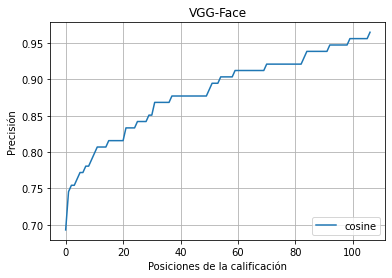

In [13]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "dimension"', "RetinaFace + recorte")

## Img2pose

In [14]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "none"', "Img2pose")

Img2pose
VGG-Face
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Ensemble
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []


In [15]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "dimension"', "Img2pose + recorte de imagenes")

Img2pose + recorte de imagenes
VGG-Face
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Ensemble
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []


In [16]:
from sklearn.metrics import average_precision_score

def calculateAveragePrecision(dorsalList: list, query: int) -> tuple:
        averagePrecision = []
        count = 0
        print(dorsalList)
        for index, dorsal in enumerate(dorsalList):
            if dorsal == query:
                count += 1
                averagePrecision.append(count / (index + 1))
            else:
                averagePrecision.append(0)

        return averagePrecision[0], sum(averagePrecision)

dorsal = 1
dorsalList = [1,0,1,2,2,3,2,1,4,5,6,7]
countTP = 1 / dorsalList.count(dorsal)
res = calculateAveragePrecision(dorsalList[0:5], dorsal)
print(countTP * res[0])
print(countTP * res[1])


print(average_precision_score())

[1, 0, 1, 2, 2]
0.3333333333333333
0.5555555555555555


TypeError: average_precision_score() missing 2 required positional arguments: 'y_true' and 'y_score'